# Main libraries
We start by importing the main libraires that we will use:

- the re module (for regular expression matching operations)<br>
- the tk toolkit (for natural language operations)<br>
- the random module (for random number generation)<br>
- the numpy library (for arrays operations)<br>
- the pandas library (for data analysis)<br>
- the scipy.stats module (for statistics)<br>
- the seaborn library (for statistical data visualization)<br>
- the matplotlib.pyplot interface (for MATLAB-like plots)<br>

### We also download the stopwords and punkt data packages from the nltk toolkit.
model.compile(optimizer='adam', loss='bce', metrics='accuracy')


In [1]:
import re
import nltk
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

# Setting as large the xtick and ytick font sizes in graphs

plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'

/home/dimitra/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to /home/dimitra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dimitra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### IMDB dataset
We retrieve from Kaggle the csv file "IMDB Dataset.csv" consisting of 50'000 IMDB movies and TV shows reviews with their positive or negative sentiment classification.

In [2]:
# Storing the csv file into a DataFrame "df"

df = pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


We print the basic properties of the DataFrame. In particular, we note that there are no null values in the DataFrame.

df.shape: (50000, 2)
df.columns: Index(['review', 'sentiment'], dtype='object') 

df.sentiment.value_counts():
positive    25000
negative    25000
Name: sentiment, dtype: int64 



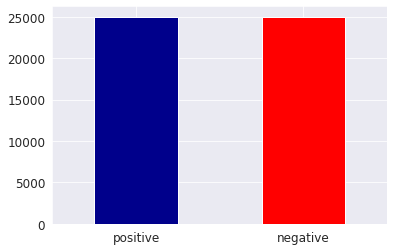

df.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [3]:
print('\033[1m' + 'df.shape:' + '\033[0m', df.shape)
print('\033[1m' + 'df.columns:' + '\033[0m', df.columns, '\n')
print('\033[1m' + 'df.sentiment.value_counts():' + '\033[0m')
print(df.sentiment.value_counts(), '\n')

with sns.axes_style("darkgrid"):
    df['sentiment'].value_counts().plot.bar(color=['darkblue', 'r'], rot=0, fontsize='large')
    plt.show()

print('\033[1m' + 'df.info:' + '\033[0m')
df.info()

To make the DataFrame suitable for analysis by converting its sentiment values to integers:

positive  <br>
→1 <br>
negative  <br>
→0

In [4]:
df.sentiment = [1 if s == 'positive' else 0 for s in df.sentiment]
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


# Data preprocessing
First, we use regular expressions to make the following transformations to the reviews:

- remove punctuation marks
- remove HTML tags
- remove URL's
- remove characters which are not letters or digits
- remove successive whitespaces
- convert the text to lower case
- strip whitespaces from the beginning and the end of the reviews

In [5]:
# Storing in "before_process" a random example of review before preprocessing for comparison reasons
# Defining and applying the function "process" performing the transformations of the reviews
# Storing in "after_process" the example of review after preprocessing for comparison reasons

exp = random.randint(0, len(df)-1)
before_process = df.iloc[exp][0]

def process(x):
    x = re.sub('[,\.!?:()"]', '', x)
    x = re.sub('<.*?>', ' ', x)
    x = re.sub('http\S+', ' ', x)
    x = re.sub('[^a-zA-Z0-9]', ' ', x)
    x = re.sub('\s+', ' ', x)
    return x.lower().strip()

df['review'] = df['review'].apply(lambda x: process(x))
after_process = df.iloc[exp][0]

Next, we remove stopwords from the reviews using the word_tokenize() function from the nltk.tokenize package.

In [6]:
# Storing in "stop_set" the set of English stopwords provided by nltk
# Defining and applying the function "stop_remove" which remove stopwords from reviews
# Storing in "after_removal" the example of review after removal of the stopwords

stop_set = set(nltk.corpus.stopwords.words('english'))

def stop_remove(x):
    words = nltk.tokenize.word_tokenize(x)
    filtered_list = [word for word in words if word not in stop_set]
    return ' '.join(filtered_list)

df['review'] = df['review'].apply(lambda x: stop_remove(x))
after_removal = stop_remove(after_process)

Lets print the example of review before preprocessing, after preprocessing and after stopwords removal

In [7]:
print('\033[1m' + 'Review #%d before preprocessing:' % exp + '\033[0m' + '\n', before_process, '\n')
print('\033[1m' + 'Review #%d after preprocessing:' % exp + '\033[0m' + '\n', after_process, '\n')
print('\033[1m' + 'Review #%d after preprocessing and stopwords removal:' % exp + '\033[0m' + '\n', after_removal)

Review #10024 before preprocessing:
 Painful. Painful is the only word to describe this awful rendition of such a fun and interesting Shakespearean play. I gave it a shot but was terribly disappointed and couldn't bare to even finish viewing it. To the person who wrote a novel about how wonderful this twist of Much Ado was, I pity you and your bored brain. May your pretenses about young viewers be lifted without retribution. Please do not even bother with this gut wrenching, disgusting excuse for a performance of an acclaimed Shakespeare drama. You will be forced to induce vomiting and will require a commode close to the television with which you choose to watch this crap because involuntary defecation will take place. 

Review #10024 after preprocessing:
 painful painful is the only word to describe this awful rendition of such a fun and interesting shakespearean play i gave it a shot but was terribly disappointed and couldn t bare to even finish viewing it to the person who wrote a n

# Data splitting and tokenization
We start by splitting our DataFrame into a training and test lists. We use the train_test_split() function from the sklearn.model_selection module which allow to perform the splitting randomly with respect to the index of the DataFrame.

In [8]:
from sklearn.model_selection import train_test_split

train_re, test_re, train_sent, test_sent = train_test_split(df['review'], df['sentiment'], test_size=0.1, random_state=42)

print('\033[1m' + 'train_rev.shape:' + '\033[0m', train_re.shape)
print('\033[1m' + 'test_rev.shape:' + '\033[0m', test_re.shape)
print('\033[1m' + 'train_sent.shape:' + '\033[0m', train_sent.shape)
print('\033[1m' + 'test_sent.shape:' + '\033[0m', test_sent.shape)

train_rev.shape: (45000,)
test_rev.shape: (5000,)
train_sent.shape: (45000,)
test_sent.shape: (5000,)


Next, we use the Tokenizer class from keras.preprocessing.text module to create a dictionary of the "dict_size" most frequent words present in the reviews (a unique integer is assigned to each word), and we print some of its attributes. The index of the Tokenizer is computed the same way no matter how many most frequent words we use later, see this post.

In [9]:
from keras.preprocessing.text import Tokenizer

dict_size = 35000
tokenizer = Tokenizer(num_words=dict_size)
tokenizer.fit_on_texts(df['review'])

print('\033[1m' + 'Dictionary size:' + '\033[0m', dict_size)
print('\033[1m' + 'Length of the tokenizer index:' + '\033[0m', len(tokenizer.word_index))
print('\033[1m' + 'Number of documents the tokenizer was trained on:' + '\033[0m', tokenizer.document_count, '\n')
print('\033[1m' + 'First 20 entries of the tokenizer index:' + '\033[0m')
print(*list(tokenizer.word_index.items())[:20])

2022-06-25 19:41:42.197455: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-25 19:41:42.197471: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Dictionary size: 35000
Length of the tokenizer index: 125791
Number of documents the tokenizer was trained on: 50000 

First 20 entries of the tokenizer index:
('movie', 1) ('film', 2) ('one', 3) ('like', 4) ('good', 5) ('time', 6) ('even', 7) ('would', 8) ('really', 9) ('story', 10) ('see', 11) ('well', 12) ('much', 13) ('get', 14) ('bad', 15) ('people', 16) ('great', 17) ('also', 18) ('first', 19) ('made', 20)


We use the texts_to_sequences() function of the Tokenizer class to convert the training reviews and test reviews to lists of sequences of integers (tokens) "train_rev_tokens" and "test_rev_tokens", and we store in the numpy array "text_lengths" the lengths of the sequences included in "train_rev_tokens".

In [10]:
train_re_tkns = tokenizer.texts_to_sequences(train_re)
test_re_tkns = tokenizer.texts_to_sequences(test_re)
text_lengths =  np.array([len(sequence) for sequence in train_re_tkns])

If the lengths of the sequences were normally distributed, then a given length could be considered small or large when outside the interval <br>

mean value of seq_lengths ± 2 standard deviations of seq_lengths, <br>
 
and lengths not belonging to this interval would only represent 5% of the elements of seq_lengths (see the 68–95–99.7 rule in statistics). Here, we follow this heuristics, and thus define an upper bound for the length of sequences accordingly.

The value of upper_bound is 291 and the percentage of sequences in "train_rev_tokens" of length smaller or equal than upper_bound is 94.56%.


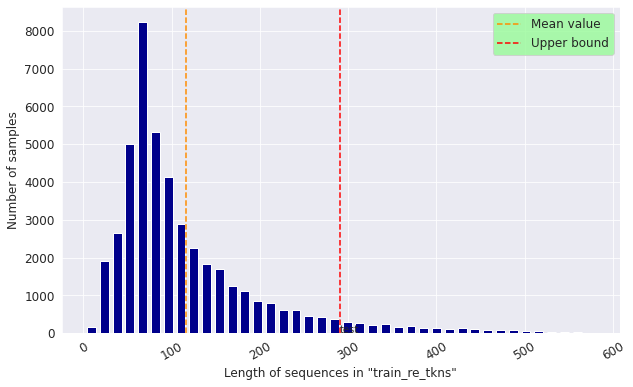

In [11]:
# Storing in "upper" our chosen upper bound for the length of sequences
# Computing the percentage of lengths smaller or equal than "upper"

upper  = int(np.mean(text_lengths) + 2 * np.std(text_lengths))
percentage = stats.percentileofscore(text_lengths, upper)

print('The value of upper_bound is %d and the percentage of sequences in "train_rev_tokens" \
of length smaller or equal than upper_bound is %.2f%%.' % (upper, round(percentage, 2)))

# Histogram plot of the lengths of the sequences in "train_rev_tokens"

with sns.axes_style("darkgrid"):

    _, hist = plt.subplots(figsize=(10,6))
    hist.hist(text_lengths[text_lengths < 2*upper], color='darkblue', bins=40, rwidth=0.7)
    hist.axvline(np.mean(text_lengths), color='darkorange', linestyle='--', label='Mean value')
    hist.axvline(upper, color='r', linestyle='--', label='Upper bound')

    plt.xlabel('Length of sequences in "train_re_tkns"', size='large')
    plt.ylabel('Number of samples', size='large')
    plt.text(upper, 0, 'test')
    plt.legend(fontsize='large', facecolor='palegreen')
    plt.xticks(rotation=30)
    plt.show()

Using the pad_sequences() function from keras.preprocessing.sequence module, we transform "train_re_tkns" and "test_re_tkns" into 2D numpy arrays of shape (number of sequences, upper). Sequences of length smaller (resp. larger) than "upper" are extended (resp. truncated) to get a length equal to "upper".

In [12]:
from keras_preprocessing.sequence import pad_sequences

train_re_pad = pad_sequences(train_re_tkns, maxlen=upper)
test_re_pad = pad_sequences(test_re_tkns, maxlen=upper)

print('\033[1m' + 'train_re_pad.shape:' + '\033[0m', train_re_pad.shape)
print('\033[1m' + 'test_re_pad.shape:' + '\033[0m', test_re_pad.shape, '\n')

# Printing an example of review after padding

exp_pad = random.randint(0, len(train_re_pad)-1)
print('\033[1m' + 'Review #%d after padding:' %exp_pad + '\033[0m' + '\n', train_re_pad[exp_pad])

train_re_pad.shape: (45000, 291)
test_re_pad.shape: (5000, 291) 

Review #36979 after padding:
 [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0    

# LSTM Model¶
### We start by importing some classes from Keras:

- the Sequential class from the keras.models API (to group a linear stack of layers into a model)
- the Embedding class from the keras.layers API (to turn positive integers (indexes) into dense vectors of fixed size
- the LSTM class from the keras.layers API (to apply a long short-term memory layer to an input)
- the Dropout class from the keras.layers API (to apply dropout to an input)
- the Dense class from the keras.layers API (to apply a regular densely-connected NN layer to an input)

In [13]:
import tensorflow as tf
from tensorflow import keras

from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Conv1D,LSTM,GRU,BatchNormalization,Flatten,Dense


In [14]:
model= keras.Sequential()
model.add(Embedding(input_dim=dict_size, output_dim=14, input_length=upper))
model.add(Conv1D(64,10,activation='relu'))
model.add(keras.layers.Bidirectional(LSTM(32,return_sequences=True)))
model.add(LSTM(16))
model.add(keras.layers.Dropout(0.8))
model.add(Dense(1,activation='sigmoid'))
          
          



2022-06-25 19:41:48.216531: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-25 19:41:48.217111: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-25 19:41:48.217165: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-25 19:41:48.217202: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-25 19:41:48.218931: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 291, 14)           490000    
                                                                 
 conv1d (Conv1D)             (None, 282, 64)           9024      
                                                                 
 bidirectional (Bidirectiona  (None, 282, 64)          24832     
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 16)                5184      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                        

In [16]:
!pip install pydot==1.2.3
!pip install graphviz


In [17]:
from keras.utils.vis_utils import plot_model

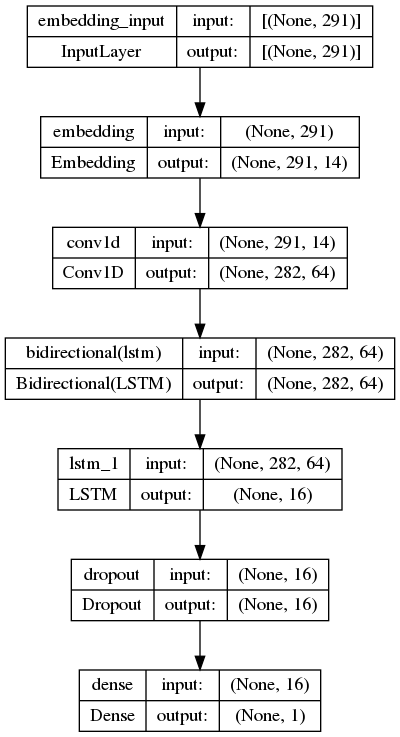

In [18]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True)

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )


In [21]:
validation_split = 0.1
batch_size = 384
epochs = 3

fitted = model.fit(train_re_pad, train_sent, validation_split=validation_split,
                   batch_size=batch_size, epochs=epochs, shuffle=True)

Epoch 1/3
106/106 [==============================] - 40s 349ms/step - loss: 0.5419 - accuracy: 0.7133 - val_loss: 0.3177 - val_accuracy: 0.8811
Epoch 2/3
106/106 [==============================] - 36s 343ms/step - loss: 0.2974 - accuracy: 0.9012 - val_loss: 0.2595 - val_accuracy: 0.8944
Epoch 3/3
106/106 [==============================] - 38s 355ms/step - loss: 0.2047 - accuracy: 0.9364 - val_loss: 0.3079 - val_accuracy: 0.8862


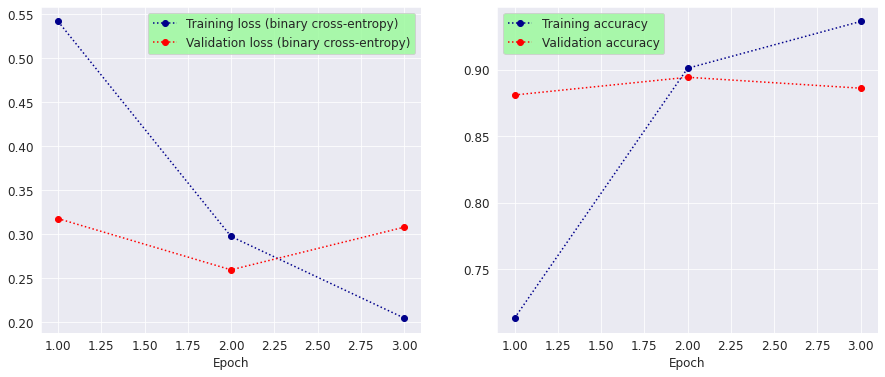

In [22]:
# Storing in "ep_values" the values of the epochs

ep_values = range(1, epochs+1)

# Plot of the training loss and validation loss (binary cross-entropy)

with sns.axes_style("darkgrid"):

    _, (loss, acc) = plt.subplots(1, 2, figsize=(15, 6))
    loss.plot(ep_values, fitted.history['loss'], color='darkblue', linestyle='dotted',
              marker='o', label='Training loss (binary cross-entropy)')
    loss.plot(ep_values, fitted.history['val_loss'], color='r', linestyle='dotted',
              marker='o', label='Validation loss (binary cross-entropy)')
    loss.set_xlabel('Epoch', size='large')
    loss.legend(fontsize='large', facecolor='palegreen')

    acc.plot(ep_values, fitted.history['accuracy'], color='darkblue', linestyle='dotted',
             marker='o', label='Training accuracy')
    acc.plot(ep_values, fitted.history['val_accuracy'], color='r', linestyle='dotted',
             marker='o', label='Validation accuracy')
    acc.set_xlabel('Epoch', size='large')
    acc.legend(fontsize='large', facecolor='palegreen')

    plt.show()

### Plots
### Live Demo??
### More epochs???